# Homework 2

## We start by uploading the file to the notebook

In [2]:
import pandas as pd

data = pd.read_csv('Booli_sold.csv')


## We then add a new column displaying the price per meter square for apartments sold

In [3]:
data['ppsqm']=data['soldPrice']/data['livingArea']

## Here we sort the apartments by price per square meter and present the top 5 most expensive

In [4]:
sorted_t = data.sort_values(by=['ppsqm'], ascending=False)
sorted_t.head()

,listPrice,rent,livingArea,rooms,published,constructionYear,objectType,booliId,soldDate,soldPrice,...,location.position.longitude,location.position.isApproximate,location.region.municipalityName,location.region.countyName,location.distance.ocean,source.name,source.id,source.type,source.url,ppsqm
67,1595000,1464.0,24.0,1.0,2016-01-07 14:51:06,1935.0,Lägenhet,2018259,2016-01-21,2500000,...,18.055270,NaN,Stockholm,Stockholms län,161,Notar,1566,Broker,http://www.notar.se/,104166.666667
50,1890000,1464.0,24.0,1.0,2016-06-11 08:55:51,1935.0,Lägenhet,2125576,2016-06-21,2450000,...,18.055270,NaN,Stockholm,Stockholms län,161,HusmanHagberg,1610,Broker,http://www.husmanhagberg.se/,102083.333333
54,1795000,1374.0,23.0,1.0,2016-04-15 19:10:49,1935.0,Lägenhet,2078171,2016-04-28,2300000,...,18.055422,True,Stockholm,Stockholms län,135,Notar,1566,Broker,http://www.notar.se/,100000.000000
34,1750000,1144.0,25.0,1.0,2017-05-18 16:20:57,1936.0,Lägenhet,2330886,2017-06-01,2210000,...,18.053880,NaN,Stockholm,Stockholms län,218,HusmanHagberg,1610,Broker,http://www.husmanhagberg.se/,88400.000000
55,1895000,1522.0,26.9,1.0,2016-04-01 22:56:37,1968.0,Lägenhet,2067384,2016-04-19,2300000,...,18.058529,True,Stockholm,Stockholms län,298,Notar,1566,Broker,http://www.notar.se/,85501.858736


## Next we extract the average price per meter square in Ekhagen

In [5]:
mean_Ek = data[data['location.address.streetAddress'].str.contains('Ekhag')]["ppsqm"].mean()
print(mean_Ek)

60636.481265425035


## An interesting part of the data is that the top 5 most expensive apartments per meter square has a lower living area, number of rooms and rent than the 5 cheapest from the list. Strange enough this cannot be explained by an more expensive location since all apartments of the two groups share at least one neighbour in the other group.

In [6]:
sorted_d = data.sort_values(by=['ppsqm'], ascending=True)
sorted_d[['livingArea','rooms', 'rent' ,'ppsqm', 'location.address.streetAddress' ]].head()

,livingArea,rooms,rent,ppsqm,location.address.streetAddress
151,63.0,2.0,2835.0,35714.285714,Docentbacken 13
146,98.0,3.0,4251.0,35714.285714,Docentbacken 5
141,69.0,2.0,3530.0,37246.376812,Ekhagsvägen 6
93,91.0,4.0,4529.0,39230.769231,Ekhagsvägen 5
156,56.0,3.0,2748.0,39285.714286,Torphagsvägen 18


In [7]:
sorted_t[['livingArea','rooms', 'rent' ,'ppsqm','location.address.streetAddress' ]].head()

,livingArea,rooms,rent,ppsqm,location.address.streetAddress
67,24.0,1.0,1464.0,104166.666667,Ekhagsvägen 8
50,24.0,1.0,1464.0,102083.333333,Ekhagsvägen 8
54,23.0,1.0,1374.0,100000.000000,Ekhagsvägen 10
34,25.0,1.0,1144.0,88400.000000,Torphagsvägen 4
55,26.9,1.0,1522.0,85501.858736,Docentbacken 1B


## Swedish Election 2018

## Upload file and sum up all legitimate votes in Stockholm

In [8]:
import pandas as pd

data = pd.read_csv('roster.csv', delimiter=';')
# ext_data= data[['RÖSTER GILTIGA','KOMMUNNAMN','LÄNSNAMN']]
# ext_data.head()
sum(data[data['LÄNSNAMN'].str.contains('Stockholm')]['RÖSTER GILTIGA'])

1426237

## To sort S, we will change the format of the numbers to numeric values, then sort them in descending order 

In [23]:
data['S'] = pd.to_numeric(data['S'].str.replace(',', '.'), errors='coerce')


sorted_S=data.sort_values(by=['S'], ascending= False)
sorted_S.head()



,LÄNSKOD,KOMMUNKOD,LÄNSNAMN,KOMMUNNAMN,M,C,L,KD,S,V,...,TRP,VL-S,ÖVR,OGEJ,BLANK,OG,RÖSTER GILTIGA,RÖSTANDE,RÖSTBERÄTTIGADE,VALDELTAGANDE
188,17,62,Värmlands län,Munkfors,"8,33","8,12","2,91","3,93",52.18,"6,11",...,NaN,NaN,NaN,NaN,"1,02",NaN,2340,2364,2777,"85,13"
286,25,81,Norrbottens län,Piteå,"11,82","7,49","2,52","4,8",47.48,"10,56",...,NaN,NaN,0,"0,03","0,61","0,02",29523,29719,33094,"89,8"
196,17,83,Värmlands län,Hagfors,"9,27","7,86","2,33","4,51",47.46,"8,27",...,NaN,NaN,NaN,NaN,"0,94","0,03",7607,7681,9134,"84,09"
279,25,13,Norrbottens län,Överkalix,"7,81","8,79","2,1","3,44",46.68,"10,49",...,NaN,NaN,"0,04",NaN,"1,28",NaN,2241,2270,2667,"85,11"
280,25,14,Norrbottens län,Kalix,"11,71","6,42","2,87","3,58",45.37,"7,88",...,NaN,NaN,NaN,"0,06","1,16","0,04",10971,11111,12765,"87,04"


## Munkfors has the highest percentage votes for S

In [24]:
sorted_v=data.sort_values(by=['VALDELTAGANDE'], ascending=False)
sorted_v[['VALDELTAGANDE','KOMMUNNAMN']].head(10)

,VALDELTAGANDE,KOMMUNNAMN
103,"93,86",Lomma
59,"93,35",Habo
98,"93,13",Vellinge
22,"92,74",Vaxholm
5,"92,16",Ekerö
14,"91,92",Danderyd
133,"91,8",Kungsbacka
136,"91,75",Öckerö
79,"91,69",Mörbylånga
28,"91,34",Knivsta


## Above we have the 3 municipialities with the highest participation in the election

# Predicting Strokes

In [6]:
import pandas as pd
data = pd.read_csv('stroke-data.csv', delimiter=',')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Conclusion from data

In [13]:
p1=sum(data[data['ever_married'].str.contains('Yes')]['stroke'])
p2=sum(data[data['ever_married'].str.contains('No')]['stroke'])
c=len(data[data['ever_married'].str.contains('Yes')])
c2=len(data[data['ever_married'].str.contains('No')])
print(p1,c)
print(p2, c2)

220 3353
29 1757


In [9]:
import numpy as np
from scipy.stats import chi2_contingency
contingency_table=np.array([[p1,c], [p2,c2]])
chi, p, df, E = chi2_contingency(contingency_table)

In [17]:
# Test 1
print(chi,p,df)
print(E)

54.2216374664185 1.7910374198475485e-13 1
[[ 166.01548796 3406.98451204]
 [  82.98451204 1703.01548796]]


In [16]:
# Test 2
chi2= (220-166.02)**2/(166.02) + (29-82.98)**2/(82.98)
print(chi2)

52.66611310888416


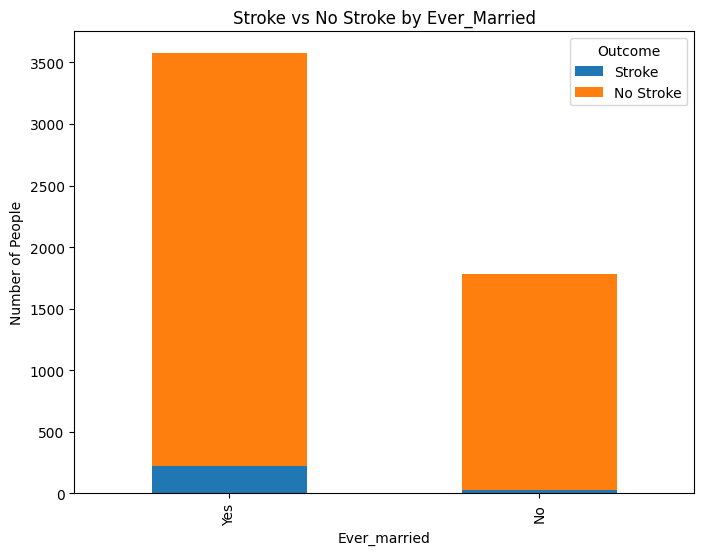

In [7]:
import matplotlib.pyplot as plt


data = pd.DataFrame({
    "Ever_Married": ["Yes", "No"],
    "Stroke": [220, 29],
    "No Stroke": [3353, 1757]
})

data.set_index("Ever_Married")[["Stroke", "No Stroke"]].plot(kind="bar", stacked=True, figsize=(8, 6))
plt.title("Stroke vs No Stroke by Ever_Married")
plt.xlabel("Ever_married")
plt.ylabel("Number of People")
plt.legend(title="Outcome")
plt.show()

# Conclusion

## We rejected a null hypothesis that the occurence of strokes were the same for married and non-married people, however we then rejected our null hypothesis with the assumption that marital status is independent of other explanatory variables. To conclude, yes marital status is linked to the occurence of strokes, however our second test suggests that other variables is at play here and hence other columns should be explored further.